In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [0]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [0]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

In [30]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [0]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [0]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [33]:
print('Total training cat images: ', num_cats_tr)
print('Total training dog images: ', num_dogs_tr)
print('Total validation cat images: ', num_cats_val)
print('Total validation dog images: ', num_dogs_val)
print('--')
print('Total training images: ', total_train)
print('Total validation images: ', total_val)

Total training cat images:  1000
Total training dog images:  1000
Total validation cat images:  500
Total validation dog images:  500
--
Total training images:  2000
Total validation images:  1000


In [0]:
BATCH_SIZE = 100
IMG_SHAPE = 150

In [0]:
train_image_generator = ImageDataGenerator(rescale = 1./255)
validation_image_generator = ImageDataGenerator(rescale = 1./255)

In [36]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [37]:
image_gen_train = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range = 0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True,
    fill_mode='nearest'
)

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory = train_dir,
                                                     shuffle = True,
                                                     target_size = (IMG_SHAPE, IMG_SHAPE),
                                                     class_mode = 'binary')

Found 2000 images belonging to 2 classes.


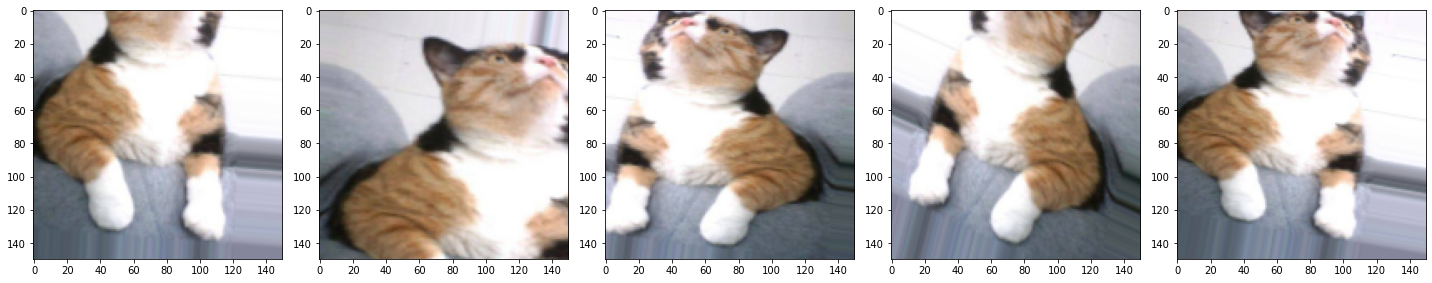

In [38]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [39]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [0]:
sample_training_images, _ = next(train_data_gen)

In [0]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize = (20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

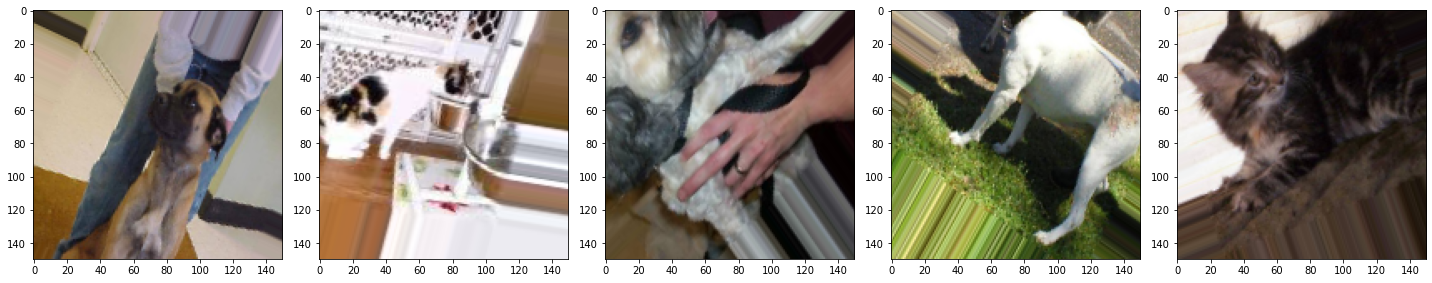

In [42]:
plotImages(sample_training_images[:5])

In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(150,150,3)),
                             tf.keras.layers.MaxPooling2D(2,2),

                             tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2,2),

                             tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2,2),

                             tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(2, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [51]:
EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch = int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs = EPOCHS,
    validation_data = val_data_gen,
    validation_steps = int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/100
20/20 [==============================] - 17s 871ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6919 - val_accuracy: 0.5030
Epoch 2/100
20/20 [==============================] - 17s 866ms/step - loss: 0.6924 - accuracy: 0.5175 - val_loss: 0.6906 - val_accuracy: 0.5190
Epoch 3/100
20/20 [==============================] - 17s 861ms/step - loss: 0.6903 - accuracy: 0.5100 - val_loss: 0.6731 - val_accuracy: 0.5700
Epoch 4/100
20/20 [==============================] - 17s 862ms/step - loss: 0.6743 - accuracy: 0.5865 - val_loss: 0.6810 - val_accuracy: 0.5610
Epoch 5/100
20/20 [==============================] - 17s 862ms/step - loss: 0.6545 - accuracy: 0.6055 - val_loss: 0.6561 - val_accuracy: 0.5840
Epoch 6/100
20/20 [==============================] - 17s 851ms/step - loss: 0.6504 - accuracy: 0.6195 - val_loss: 0.6240 - val_accuracy: 0.6620
Epoch 7/100
20/20 [==============================] - 17s 850ms/step - loss: 0.6442 - accuracy: 0.6280 - val_loss: 0.6420 - val_accuracy:

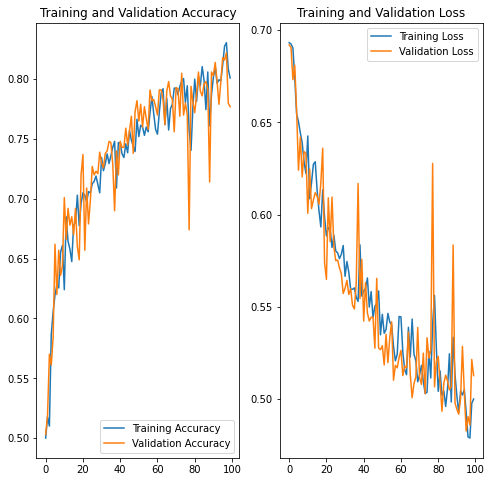

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()